In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<AxesSubplot:>

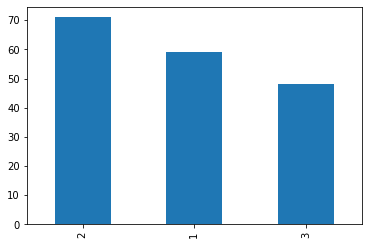

In [6]:
#target column is wine
df['Wine'].value_counts().plot(kind='bar')

In [7]:
#defining X and y
X=df.drop('Wine',axis=1)
y=pd.get_dummies(df['Wine'])

In [8]:
#dividing training and validation data
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42)

In [9]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [10]:
#plotting loss and accuracy during training
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(13,input_dim=13,activation='relu'))#input layer with input_dim=13 because there are 13 columns inn training data
model.add(tf.keras.layers.Dense(13,activation='relu'))#dense layer 1
model.add(tf.keras.layers.Dense(13,activation='relu'))#dense layer 2
model.add(tf.keras.layers.Dense(3,activation='softmax'))#output layer with 3 neurons because there are three possible outputs

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 3)                 42        
                                                                 
Total params: 588
Trainable params: 588
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss = tf.keras.losses.categorical_crossentropy, 
              metrics = ["acc"])

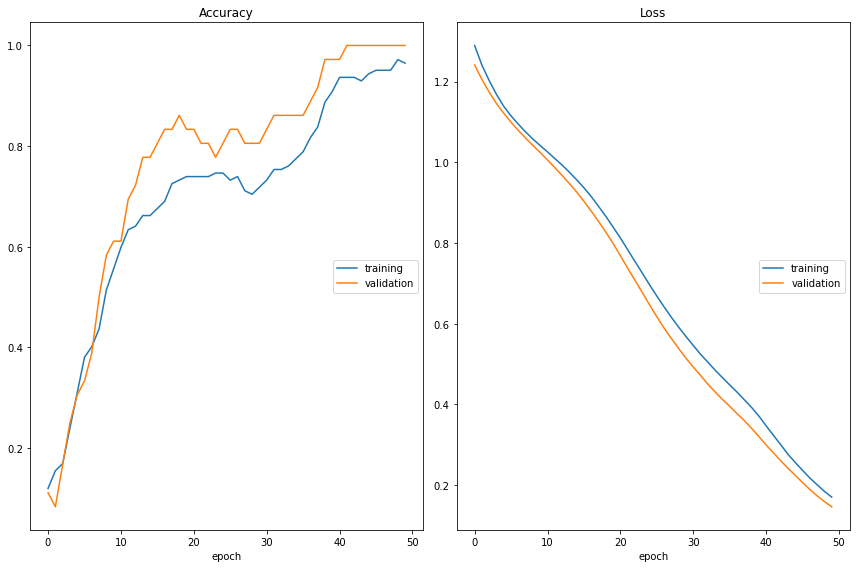

Accuracy
	training         	 (min:    0.120, max:    0.972, cur:    0.965)
	validation       	 (min:    0.083, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.171, max:    1.289, cur:    0.171)
	validation       	 (min:    0.147, max:    1.241, cur:    0.147)
5/5 [==============================] - 0s 78ms/step - loss: 0.1706 - acc: 0.9648 - val_loss: 0.1467 - val_acc: 1.0000


In [14]:
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=50,
                    validation_data=(X_val_scaled,y_val),
                    shuffle=True,verbose=1,
                    callbacks=[plot_losses])

In [15]:
y_preds=np.argmax(model.predict(X_val_scaled),axis=1)

2/2 [==============================] - 0s 2ms/step


In [16]:
y_preds

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0], dtype=int64)